#Supevised classification

Supervised classification in machine learning is a type of supervised learning where the algorithm learns to classify input data into predefined categories or classes based on labeled training examples. It is a common task in which you have a dataset consisting of input samples and their corresponding target labels or classes. The goal is to build a model that can accurately map new, unseen data points to one of these predefined classes.

#Dataset

The Mushroom Dataset is sourced from the Audubon Society Field Guide and contains descriptions of mushrooms based on their physical characteristics. The main objective of this dataset is to classify mushrooms as either poisonous or edible.

Dataset Characteristics:

    Data Type: Multivariate
    Subject Area: Life Science
    Associated Tasks: Classification
    Attribute Type: Categorical
    Number of Instances: 8,124
    Number of Attributes: 22

This dataset consists of 8,124 instances, each described by 22 different attributes, and it is primarily used for classification tasks in the field of life science. The goal is to determine whether a given mushroom is poisonous or safe to consume based on its physical characteristics as described in the dataset.

In this project, Machine Learning classifiers will be applied to classify mushrooms as either poisonous or edible based on their physical characteristics.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
path = '/content/drive/MyDrive/ML/Supervised Learning/classification/data/mushrooms.csv'
df = pd.read_csv(path)

#EDA

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process for machine learning (ML). It involves the systematic examination and visualization of data to gain insights, identify patterns, and prepare the data for further analysis and modeling.

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Check how many nulls

In [4]:
df.isna().sum().sum()

0

Descriptive statistics

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Check how many unique values per variable

In [7]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [9]:
from sklearn import preprocessing
def encode_features(df):
  features = [col for col in df.columns]
  for col in features:


      lbl = preprocessing.LabelEncoder()

      # fit label encoder on all data
      lbl.fit(df[col])
      # transform all the data
      df.loc[:, col] = lbl.transform(df[col])

  return df

In [10]:
df = encode_features(df)

<ipython-input-9-4b19d512c7fb>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
<ipython-input-9-4b19d512c7fb>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
<ipython-input-9-4b19d512c7fb>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

In [11]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


#Feature Engineering

Train/test split

In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your input features and 'y' contains your target variable
X = df.drop('class', axis=1)  # Replace 'class' with the actual name of your target column
y = df['class']

# Split the data into training and testing sets (e.g., 80% train, 20% test) with a specified random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,7,2,0,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,3,7,7,0,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,4


#ML classification

##Logistic Regression

Simple logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression classifier with specified hyperparameters
logistic_regression_model = LogisticRegression(
    penalty='l2',          # Regularization type: 'l1', 'l2', 'elasticnet', or 'none'
    C=1.0,                 # Inverse of regularization strength (smaller values mean stronger regularization)
    max_iter=100,          # Maximum number of iterations for optimization
    solver='lbfgs',        # Optimization algorithm: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
    multi_class='auto',    # Multi-class strategy: 'ovr' (one-vs-rest) or 'multinomial'
    class_weight=None,     # Class weights (dict or 'balanced')
    random_state=None      # Random seed for reproducibility
)

# Fit the classifier to the training data
logistic_regression_model.fit(X_train, y_train)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix:
[[798  45]
 [ 41 741]]


##Support Vector Machine

In [18]:
# Create an instance of the Support Vector Machine classifier
from sklearn.svm import SVC

svm_classifier = SVC(
    C=1.0,              # Regularization parameter
    kernel='rbf',       # Kernel type: 'linear', 'rbf', 'poly', 'sigmoid', etc.
    degree=3,           # Degree of the 'poly' kernel (if used)
    gamma='scale',      # Kernel coefficient (scale, auto, or float)
    coef0=0.0,          # Independent term in the kernel function (if used)
    shrinking=True,     # Enable/disable shrinking heuristic
    probability=False,  # Enable probability estimates
    class_weight=None,  # Class weights (dict or 'balanced')
    random_state=None   # Random seed for reproducibility
)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [26]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix:
[[842   1]
 [ 11 771]]


##K-Nearest Neighbors (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the K-Nearest Neighbors classifier with specified hyperparameters
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,           # Number of neighbors to consider
    weights='uniform',       # Weighting of neighbors: 'uniform' or 'distance'
    algorithm='auto',        # Algorithm used to compute nearest neighbors: 'auto', 'ball_tree', 'kd_tree', 'brute'
    leaf_size=30,            # Leaf size for tree-based algorithms (if used)
    p=2,                     # Power parameter for Minkowski distance metric (2 for Euclidean distance)
    metric='minkowski',      # Distance metric for evaluating similarity: 'minkowski', 'manhattan', 'euclidean', etc.
    metric_params=None       # Additional keyword arguments for the distance metric function
)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[837   6]
 [  0 782]]


##Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree classifier with specified hyperparameters
decision_tree_classifier = DecisionTreeClassifier(
    criterion='gini',          # Splitting criterion: 'gini' or 'entropy'
    splitter='best',           # Strategy for choosing splits: 'best' or 'random'
    max_depth=None,            # Maximum depth of the tree
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be a leaf node
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction of the sum total of weights
    max_features=None,         # Number of features to consider when looking for the best split
    random_state=None,         # Random seed for reproducibility
    class_weight=None          # Class weights (dict or 'balanced')
)

# Fit the classifier to the training data
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


##Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier with specified hyperparameters
gaussian_nb_classifier = GaussianNB(
    priors=None,             # Prior probabilities of the classes (array-like)
    var_smoothing=1e-9       # Portion of the largest variance of all features to add to the variances for calculation stability
)

# Fit the classifier to the training data
gaussian_nb_classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
# Make predictions on the test set
y_pred = gaussian_nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix:
[[771  72]
 [ 55 727]]


Bernoulli NB

In [31]:
from sklearn.naive_bayes import BernoulliNB

# Create an instance of the Bernoulli Naive Bayes classifier
bernoulli_nb_classifier = BernoulliNB(
    alpha=1.0,           # Additive (Laplace/Lidstone) smoothing parameter
    binarize=0.0,        # Threshold for binarizing feature values
    fit_prior=True,      # Whether to learn class prior probabilities or use uniform priors
    class_prior=None     # Prior probabilities of the classes (array-like)
)

# Fit the classifier to the training data
bernoulli_nb_classifier.fit(X_train, y_train)

BernoulliNB()

In [32]:
# Make predictions on the test set
y_pred = bernoulli_nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       843
           1       0.93      0.73      0.82       782

    accuracy                           0.84      1625
   macro avg       0.86      0.84      0.84      1625
weighted avg       0.86      0.84      0.84      1625

Confusion Matrix:
[[797  46]
 [211 571]]


Multinomial NB

In [33]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
multinomial_nb_classifier = MultinomialNB(
    alpha=1.0           # Additive (Laplace/Lidstone) smoothing parameter
)

# Fit the classifier to the training data
multinomial_nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [35]:
# Make predictions on the test set
y_pred = multinomial_nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       843
           1       0.91      0.66      0.77       782

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.80      1625

Confusion Matrix:
[[792  51]
 [262 520]]


##Stocasic Gradient Descent

In [16]:
from sklearn.linear_model import SGDClassifier

# Create an instance of the SGD Classifier with specified hyperparameters
sgd_classifier = SGDClassifier(
    loss='hinge',               # Loss function: 'hinge' (SVM), 'log', 'modified_huber', etc.
    penalty='l2',              # Regularization term: 'l2', 'l1', 'elasticnet', or 'none'
    alpha=0.0001,              # Regularization strength (alpha)
    l1_ratio=0.15,             # Elastic Net mixing parameter (only if penalty='elasticnet')
    fit_intercept=True,        # Whether to include intercept (bias term)
    max_iter=1000,             # Maximum number of iterations
    tol=1e-3,                  # Tolerance for stopping criteria
    shuffle=True,              # Whether to shuffle training data before each epoch
    random_state=None,         # Random seed for reproducibility
    learning_rate='optimal',   # Learning rate schedule: 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.0,                  # Initial learning rate (only if learning_rate='constant')
    power_t=0.5,               # Exponent for inverse scaling learning rate (only if learning_rate='invscaling')
    early_stopping=False,      # Whether to use early stopping for validation performance
    validation_fraction=0.1,   # Fraction of training data to set aside for validation (if early_stopping=True)
    n_iter_no_change=5,        # Number of iterations with no improvement before early stopping (if early_stopping=True)
    class_weight=None,         # Class weights (dict or 'balanced')
    warm_start=False           # Whether to reuse previous fits to initialize the model
)

# Fit the classifier to the training data
sgd_classifier.fit(X_train, y_train)

SGDClassifier()

In [20]:
# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix:
[[794  49]
 [ 35 747]]


##Gaussian Process

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C

# Define the kernel for the Gaussian Process (you can choose one of these)
kernel = 1.0 * RBF(length_scale=1.0)  # Radial Basis Function (RBF) kernel
# kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)  # Matérn kernel

# Create an instance of the Gaussian Process classifier with specified hyperparameters
gp_classifier = GaussianProcessClassifier(
    kernel=kernel,                 # The chosen kernel function
    optimizer='fmin_l_bfgs_b',    # Optimization method for finding kernel parameters
    n_restarts_optimizer=10,       # Number of restarts for the optimizer
    max_iter_predict=100,          # Maximum iterations for prediction
    warm_start=False,              # Whether to reuse previous fits to initialize the model
    copy_X_train=True              # Whether to copy the training data (recommended)
)

# Fit the classifier to the training data
gp_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = gp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

##Ensemble methods

###Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier with specified hyperparameters
random_forest_classifier = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    criterion='gini',        # Splitting criterion: 'gini' or 'entropy'
    max_depth=None,           # Maximum depth of the trees
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be a leaf node
    max_features='auto',     # Number of features to consider when looking for the best split
    random_state=None,       # Random seed for reproducibility
    class_weight=None,       # Class weights (dict or 'balanced')
    bootstrap=True,          # Whether to use bootstrap samples
    oob_score=False,         # Whether to calculate out-of-bag (OOB) score
    n_jobs=None              # Number of CPU cores to use for parallel processing
)

# Fit the classifier to the training data
random_forest_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto')

In [22]:
# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


###XGBoost

In [23]:
from xgboost import XGBClassifier

# Create an instance of the XGBoost Classifier with specified hyperparameters
xgb_classifier = XGBClassifier(
    learning_rate=0.1,      # Step size shrinkage used in update to prevent overfitting
    n_estimators=100,       # Number of boosting rounds (trees)
    max_depth=3,            # Maximum depth of each tree
    min_child_weight=1,     # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,                # Minimum loss reduction required to make a further partition on a leaf node
    subsample=1.0,          # Fraction of samples used for fitting the trees
    colsample_bytree=1.0,   # Fraction of features used for building each tree
    objective='binary:logistic',  # Learning task and objective function
    scale_pos_weight=1,     # Controls the balance of positive and negative weights, useful for imbalanced classes
    random_state=42,        # Random seed for reproducibility
    n_jobs=-1               # Number of CPU cores to use for parallel processing (-1 for all available cores)
)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [24]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


###Voting Classifier

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create base classifiers with specified hyperparameters
logistic_regression = LogisticRegression(
    solver='liblinear',
    random_state=42
)

random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Create an instance of the Voting Classifier with specified hyperparameters
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('rf', random_forest),
        ('gb', gradient_boosting)
    ],
    voting='hard',   # 'hard' for majority voting, 'soft' for weighted voting based on class probabilities
    n_jobs=-1        # Number of CPU cores to use for parallel processing (-1 for all available cores)
)

# Fit the classifier to the training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 n_jobs=-1)

In [26]:
# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       843
           1       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix:
[[831  12]
 [ 16 766]]


###Stacked Generalization

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create base classifiers with specified hyperparameters
logistic_regression = LogisticRegression(
    solver='liblinear',
    random_state=42
)

random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Create a meta-classifier (can be any classifier, here we use Logistic Regression)
meta_classifier = LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Create an instance of the Stacking Classifier with specified hyperparameters
stacking_classifier = StackingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('rf', random_forest),
        ('gb', gradient_boosting)
    ],
    final_estimator=meta_classifier,
    cv=5,  # Number of cross-validation folds for training the meta-classifier
    n_jobs=-1  # Number of CPU cores to use for parallel processing (-1 for all available cores)
)

# Fit the classifier to the training data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(random_state=42,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(max_depth=3,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42,
                                                      solver='liblinear'),
                   n_jobs=-1)

In [31]:
# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


#Multi-layer Perceptron (MLP)

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the MLPClassifier with your desired hyperparameters
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Specify the number of neurons in each hidden layer
    activation='relu',             # Activation function ('relu', 'tanh', 'logistic', etc.)
    solver='adam',                 # Optimization solver ('adam', 'sgd', 'lbfgs')
    alpha=0.0001,                  # L2 regularization parameter
    batch_size='auto',             # Size of minibatches for optimization
    learning_rate='constant',      # Learning rate schedule ('constant', 'adaptive', etc.)
    learning_rate_init=0.001,      # Initial learning rate
    max_iter=200,                  # Maximum number of iterations
    random_state=42,               # Random seed for reproducibility
    verbose=False                  # Whether to print progress messages
)

# Fit the classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [32]:
# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


#Feature Importance

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Top 10 Most Important Features:
odor: 0.1764
gill-size: 0.1080
spore-print-color: 0.1069
gill-color: 0.1048
ring-type: 0.0665
stalk-root: 0.0645
population: 0.0604
stalk-surface-above-ring: 0.0547
bruises: 0.0481
stalk-surface-below-ring: 0.0351


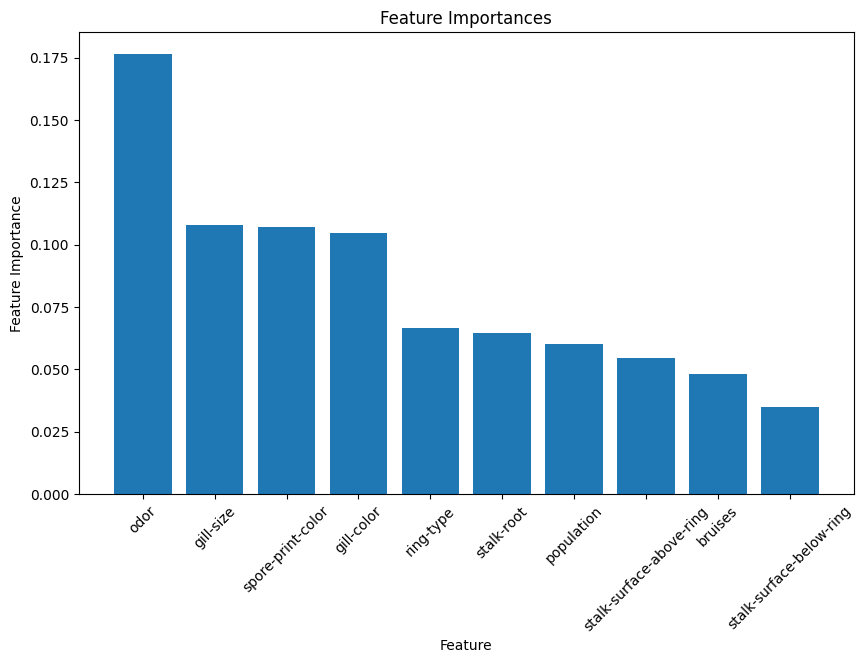

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create an instance of the Random Forest Classifier with your desired hyperparameters
random_forest_classifier = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    criterion='gini',        # Splitting criterion: 'gini' or 'entropy'
    max_depth=None,           # Maximum depth of the trees
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be a leaf node
    max_features='auto',     # Number of features to consider when looking for the best split
    random_state=42          # Random seed for reproducibility
)

# Fit the classifier to the training data
random_forest_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_classifier.feature_importances_

# Get the names of your features (assuming X_train is a DataFrame or array with named features)
feature_names = X_train.columns  # Replace with your actual feature names or column names

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Print and plot the top N most important features
top_n = 10  # Change this to the number of top features you want to display
print(f"Top {top_n} Most Important Features:")
for i in range(top_n):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]:.4f}")

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(top_n), feature_importances[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()